In [99]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
#from vaegan_fc import *
from vaegan_conv import *
from vaegan import VAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [100]:
tf.reset_default_graph()

In [78]:
# Train
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 5e-4, num_epochs = 5, load=False, #lr_decay=0.95, lr_decay_freq=1000,
          checkpoint_name='test'
)

In [101]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = VAEGAN(sess, build_encoder, build_decoder, build_discriminator, dataset=mnist.train,
            batch_size = 100, z_dim = 50, x_dim = 784,
           learning_rate = 1e-3, num_epochs = 5, load=True, #lr_decay=0.95, lr_decay_freq=1000,
               load_file = 'checkpoints/vaegan_conv'
)

In [81]:
model.train()

Epoch 11 loss: 115.028356934 (time: 116.136436939 s)
Epoch 12 loss: 114.244686265 (time: 123.380084038 s)
Epoch 13 loss: 113.787339436 (time: 118.536731005 s)
Epoch 14 loss: 113.377498863 (time: 118.738541842 s)
Epoch 15 loss: 112.907708685 (time: 119.973090172 s)
9.94611200094 min


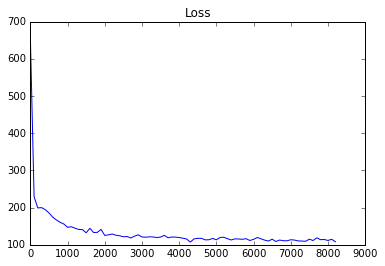

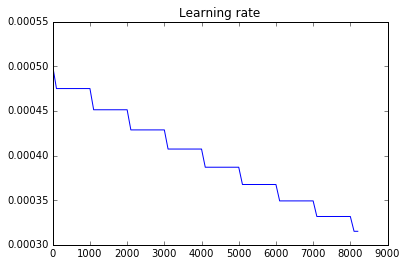

In [82]:
log = model.log
log = np.array(log).T
plt.plot(log[0,], log[1,])
plt.title('Loss')
plt.show()
plt.plot(log[0,], log[2,])
plt.title('Learning rate')
plt.show()

In [102]:
generated_images = model.generate()

In [106]:
x = mnist.test.images[xrange(100)]
x_dis_real = sess.run(model.dis_real, feed_dict={model.x:x})
#print dis_real.T

0.862967


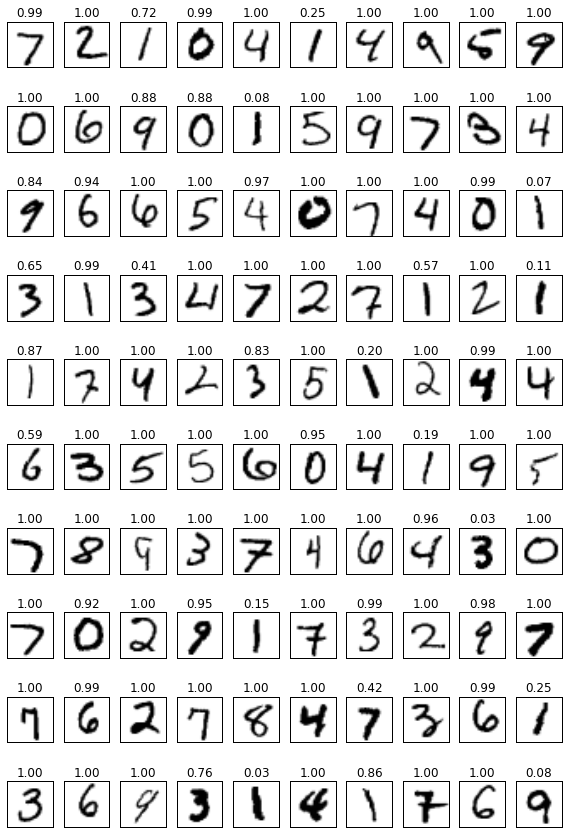

In [107]:
num_examples=10
print np.mean(x_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(x[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(x_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_600')
plt.show()

In [103]:
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})
#print gen_dis_real.T

0.0637461


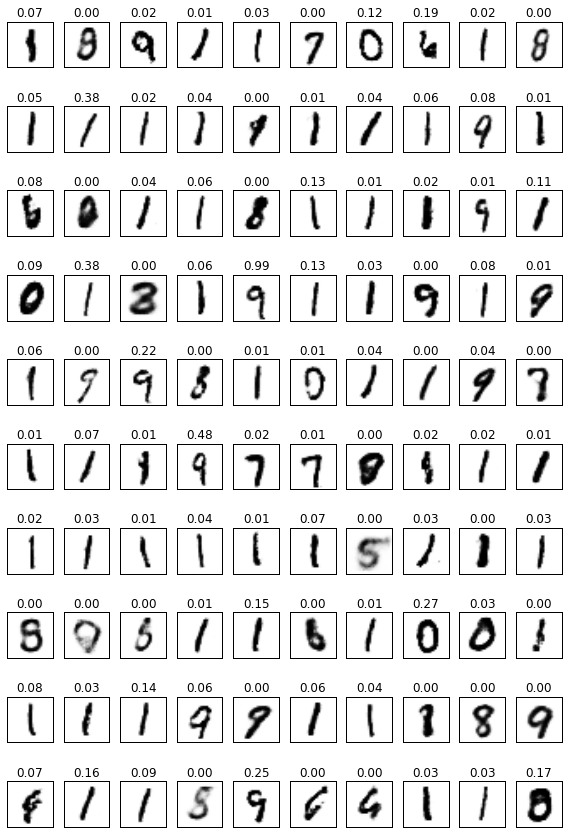

In [104]:
num_examples=10
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j][0]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/VAEGAN_gen_fc')
plt.show()

In [105]:
rando = np.random.randn(100, 28*28)
rando_dis_real = sess.run(model.dis_real, feed_dict={model.x:rando})
print rando_dis_real.T

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
